<a href="https://colab.research.google.com/github/gustavor10silva/IC-Redes-Neurais/blob/main/Chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# From Biological to Artificial Neurons

Cell body: metabolic center

Dendrites: receptors

Axon: transmitter

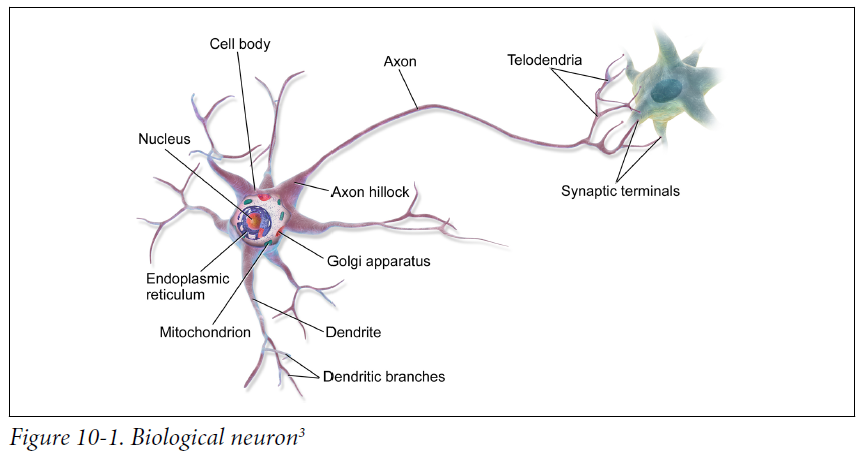

This is a Threshold logic unit (TLU)

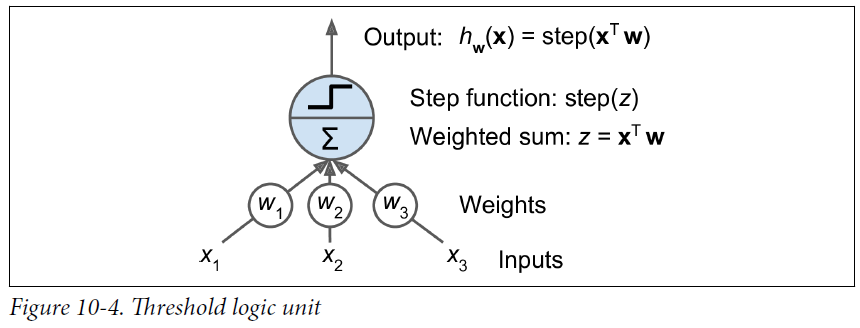

This is a simple Perceptron diagram (only input and output layers)

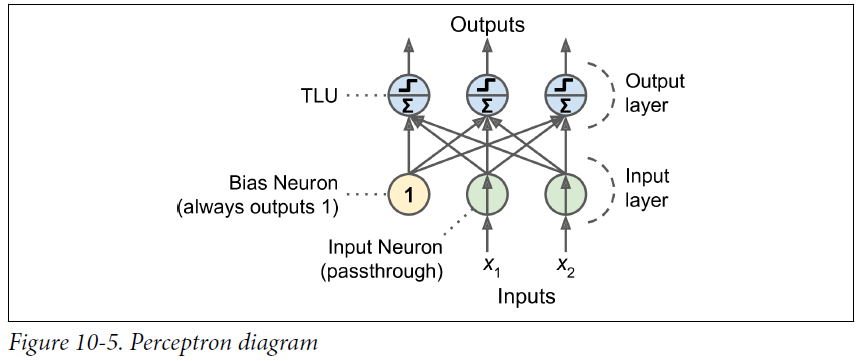

Computing the outputs of a fully connected layer:

$h_{W,b}(X) = \phi(XW + b)$

Perceptron learning rule (weight update) (???????)

MLP solving the XOR problem

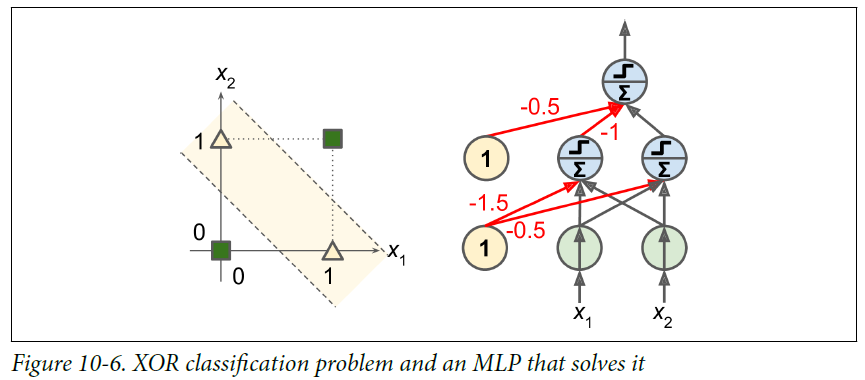

MLP and backpropagation

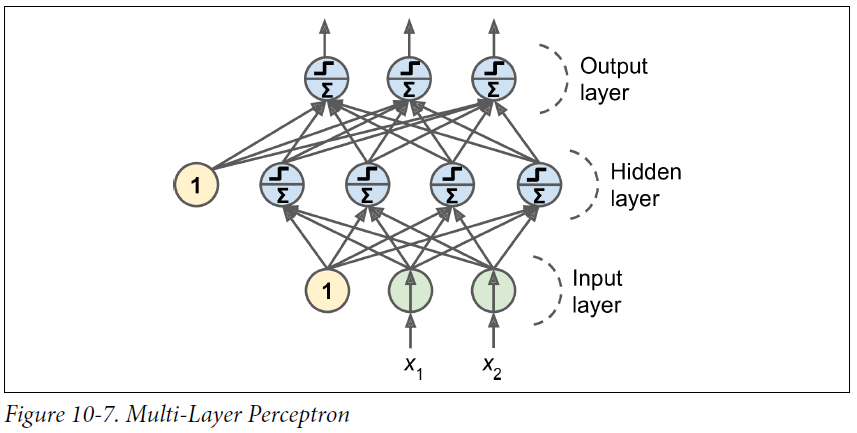

Activation functions and their derivatives

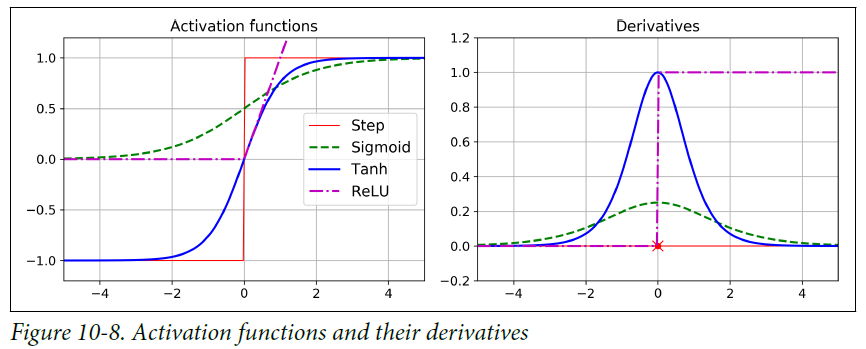

The MLP can be used in regression and classification tasks. We can see the differences below

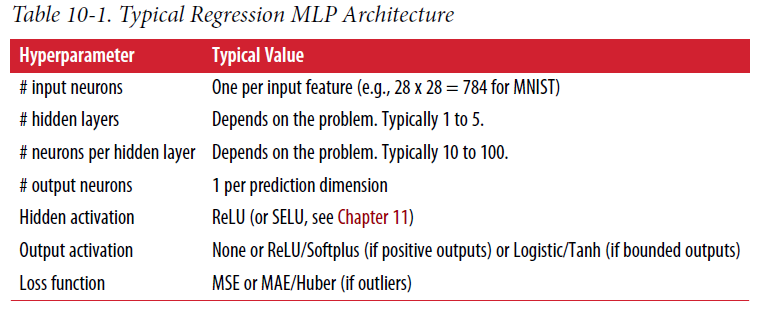

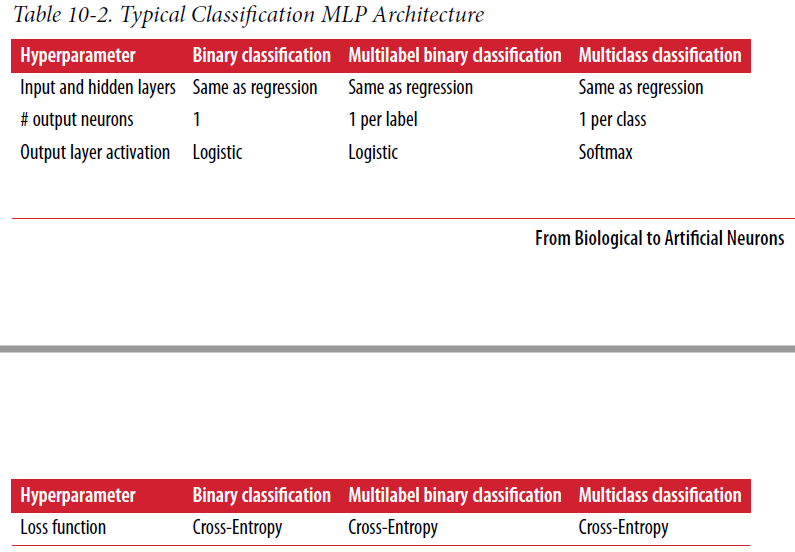

# Building an Image Classifier Using the Sequential API (fashion MNIST dataset)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Coat


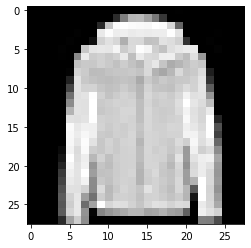

T-shirt/top


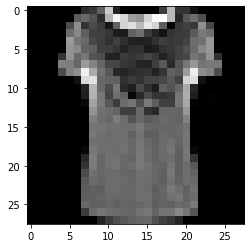

Sneaker


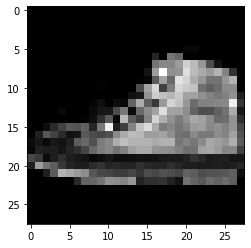

In [7]:
for i in range(3):
  fig = plt.figure
  plt.imshow(X_train[i], cmap='gray')
  print(class_names[y_train[i]])
  plt.show()

In [8]:
model = keras.models.Sequential() #creating the sequential model
model.add(keras.layers.Flatten(input_shape=[28, 28])) #input layer that receive X and computing 
model.add(keras.layers.Dense(300, activation="relu")) #first dense hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) #second dense hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) #output layer with softmax activation function and 10 neurons (one per class)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
for i in range(4):
  print(model.layers[i].name)

flatten
dense
dense_1
dense_2


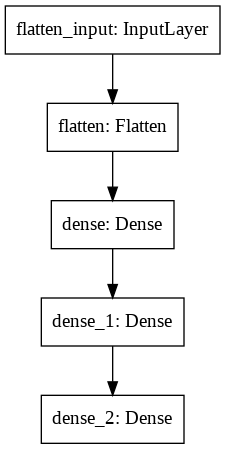

In [12]:
keras.utils.plot_model(model)

In [13]:
#model.get_weights()

In [14]:
#for lay in model.layers:
#    print(lay.name)
#    print(lay.get_weights())

In [15]:
model.compile(loss="sparse_categorical_crossentropy", # because for each instance there's just a class and the classes are exclusive
optimizer="sgd",
metrics=["accuracy"])

In the bellow training, note that after 130 epochs the model overfitting. We noticed this because of the 10% difference between the training acuraccy and validation acuraccy

In [19]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0240 - accuracy: 0.6822 - val_loss: 0.5713 - val_accuracy: 0.8012
Epoch 2/150
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5079 - accuracy: 0.8249 - val_loss: 0.4511 - val_accuracy: 0.8472
Epoch 3/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4512 - accuracy: 0.8432 - val_loss: 0.4216 - val_accuracy: 0.8574
Epoch 4/150
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4242 - accuracy: 0.8521 - val_loss: 0.3981 - val_accuracy: 0.8606
Epoch 5/150
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3989 - accuracy: 0.8597 - val_loss: 0.3968 - val_accuracy: 0.8630
Epoch 6/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3854 - accuracy: 0.8641 - val_loss: 0.3767 - val_accuracy: 0.8684
Epoch 7/150
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3619 - accuracy: 0.8716 - val_loss: 0.3684 - val_ac

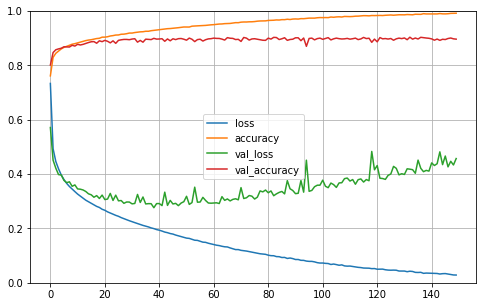

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In the book "Hands On...", after training during 30 epochs, the test loss and acuraccy was [0.40738476498126985, 0.854]. In this model, after training during 150 epochs, the result was [132.8673858642578, 0.8410000205039978]

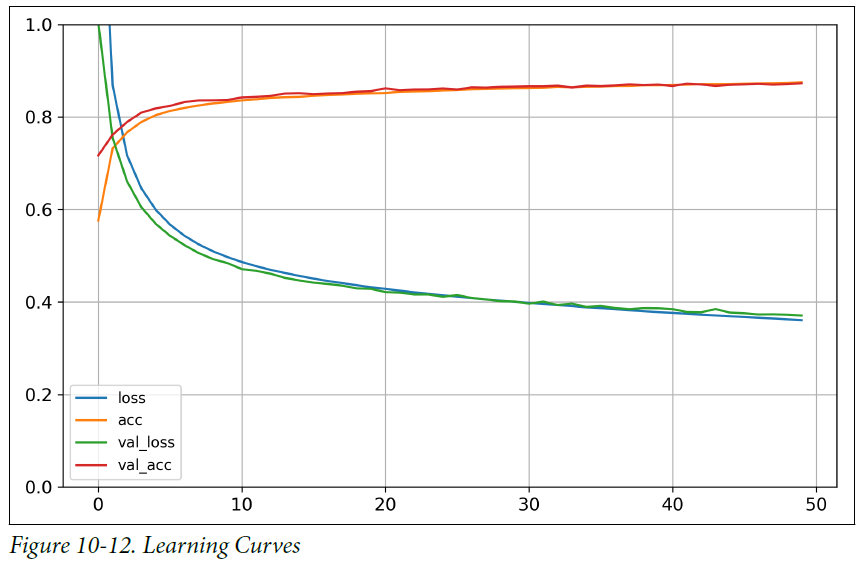

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 132.8674 - accuracy: 0.8410


[132.8673858642578, 0.8410000205039978]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new) #to return the probabilities of each class
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
#y_pred = model.predict_classes(X_new) #is depreciated / outdated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred, y_test[:3] # note that the previsions are correctly

(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Ankle boot


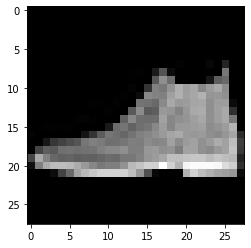

Pullover


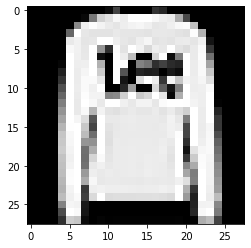

Trouser


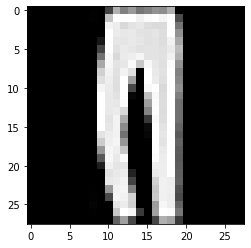

In [29]:
for i in range(3):
  fig = plt.figure
  plt.imshow(X_new[i], cmap='gray')
  print(class_names[y_pred[i]])
  plt.show()

# Building a Regression MLP Using the Sequential API

In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=50,
validation_data=(X_valid_scaled, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.3037 - val_loss: 0.5125
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5130 - val_loss: 0.4457
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4542 - val_loss: 0.4175
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.4135
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4085 - val_loss: 0.3987
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.3859
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3885 - val_loss: 0.3866
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4080 - val_loss: 0.3840
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4004 - val_loss: 0.3772
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3804 - val_loss: 0.3618

In [37]:
mse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 811us/step - loss: 0.3159


In [38]:
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred, y_test[:3]

(array([[2.192124 ],
        [2.1720114],
        [2.473556 ]], dtype=float32), array([2.265, 4.1  , 2.472]))

# Building Complex Models Using the Functional API (California housing problem)

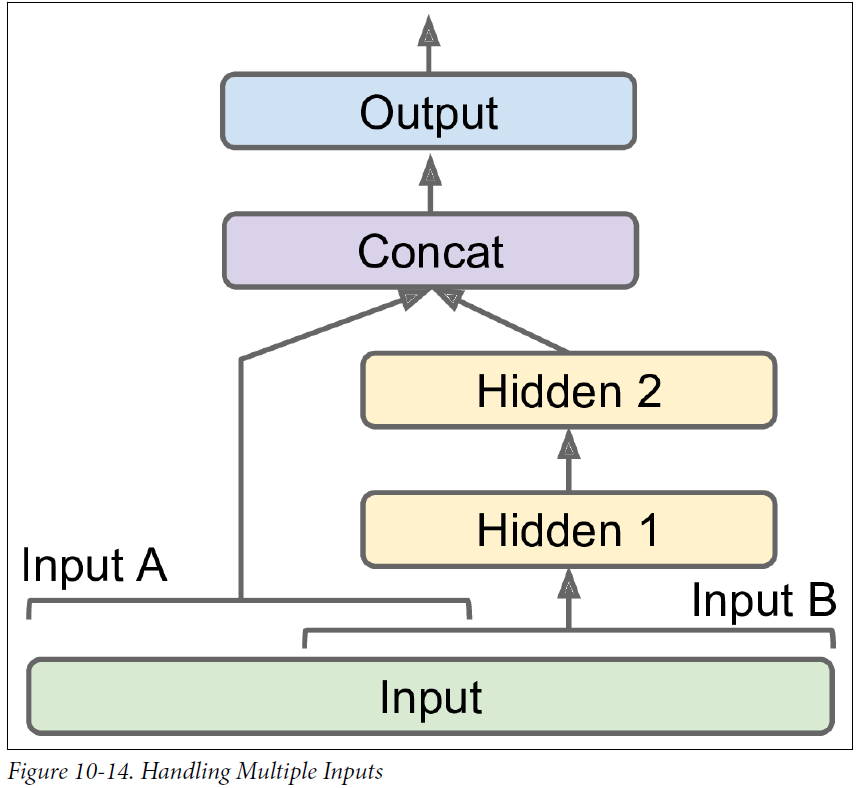

In [66]:
input = keras.layers.Input(shape=X_train.shape[1:]) # input layer
hidden1 = keras.layers.Dense(30, activation="relu")(input) # first hidden layer, connected to the input layer
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # second hidden layer, connected to the first hidden layer
concat = keras.layers.Concatenate()([input, hidden2]) # concatenate layer, which inputs are input layer and second hidden layer
output = keras.layers.Dense(1)(concat) # output layer, where your input is the concatenate layer
model = keras.models.Model(inputs=[input], outputs=[output]) # create the model

In [67]:
#input_A = keras.layers.Input(shape=[5])
#input_B = keras.layers.Input(shape=[6])
#hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
#hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
#concat = keras.layers.concatenate([input_A, hidden2])
#output = keras.layers.Dense(1)(concat)
#model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
b